
Predictive Analysis on Credit Card Defaults Based on Demographic Factors and Payment Behaviour

CIND 820

Project by: Md Fahim Ferdous
ID: 501232653

Import the dataset into colab

In [1]:
!pip3 install -U ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)






{'uci_id': 350, 'name': 'Default of credit card clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'The comparisons of data mining techniques for the predictive accuracy of probability of default of cre

Checking Anomaly and missing data

In [3]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

# Read the Excel file from the URL into a DataFrame
df = pd.read_excel(url, header=1)
#To verify if there is missing or anomalous data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Checking data by category

In [4]:
print(df['SEX'].value_counts()[[1,2]])
print(df['MARRIAGE'].value_counts())
print(df['EDUCATION'].value_counts())
pay_counts = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6']].apply(lambda x: x.value_counts())

# Print the result
print(pay_counts)

1    11888
2    18112
Name: SEX, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
    PAY_0  PAY_2  PAY_3  PAY_4    PAY_5    PAY_6
-2   2759   3782   4085   4348   4546.0   4895.0
-1   5686   6050   5938   5687   5539.0   5740.0
 0  14737  15730  15764  16455  16947.0  16286.0
 1   3688     28      4      2      NaN      NaN
 2   2667   3927   3819   3159   2626.0   2766.0
 3    322    326    240    180    178.0    184.0
 4     76     99     76     69     84.0     49.0
 5     26     25     21     35     17.0     13.0
 6     11     12     23      5      4.0     19.0
 7      9     20     27     58     58.0     46.0
 8     19      1      3      2      1.0      2.0


In [5]:
df['MARRIAGE'].unique()


array([1, 2, 3, 0])

In [6]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [7]:
df['SEX'].unique()

array([2, 1])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Data Cleaning

In [9]:
#remaning the data label for uniformity
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
#unlabeled data for 'MARRIAGE' and 'EDUCATION', 0 counted as missing
df1=df.loc[(df['EDUCATION']!=0)& (df['MARRIAGE']!=0)]
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
#for 'EDUCATION' CONSIDERING 5 AND 6 UNDER CATEGORY 4
df1['EDUCATION'].replace({5:4,6:4},inplace=True)
df1['EDUCATION'].value_counts()

<ipython-input-11-64b42e0edc70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['EDUCATION'].replace({5:4,6:4},inplace=True)


2    14024
1    10581
3     4873
4      454
Name: EDUCATION, dtype: int64

In [12]:
#for PAY_1 to PAY_6, -1 means pay duely, so -1,0 and -2 has been adjusted to 0, indicating paid duely
df1['PAY_1'].replace({-2:0,-1:0,0:0},inplace=True)
df1['PAY_2'].replace({-2:0,-1:0,0:0},inplace=True)
df1['PAY_3'].replace({-2:0,-1:0,0:0},inplace=True)
df1['PAY_4'].replace({-2:0,-1:0,0:0},inplace=True)
df1['PAY_5'].replace({-2:0,-1:0,0:0},inplace=True)
df1['PAY_6'].replace({-2:0,-1:0,0:0},inplace=True)
df1.PAY_1.value_counts()
df2=df1
df2


<ipython-input-12-6c576ac002ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PAY_1'].replace({-2:0,-1:0,0:0},inplace=True)
<ipython-input-12-6c576ac002ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PAY_2'].replace({-2:0,-1:0,0:0},inplace=True)
<ipython-input-12-6c576ac002ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PAY_3'].replace({-2:0,-1:0,0:0},inplace=True)
<ipython-input-12-6c576ac002ed>:5: SettingW

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Exploratory Data Analysis

[[<Axes: title={'center': 'LIMIT_BAL'}>]]
[[<Axes: title={'center': 'AGE'}>]]
[[<Axes: title={'center': 'SEX'}>]]
[[<Axes: title={'center': 'EDUCATION'}>]]
[[<Axes: title={'center': 'MARRIAGE'}>]]
[[<Axes: title={'center': 'PAY_1'}> <Axes: title={'center': 'PAY_2'}>]]
[[<Axes: title={'center': 'PAY_3'}> <Axes: title={'center': 'PAY_4'}>]]
[[<Axes: title={'center': 'PAY_5'}> <Axes: title={'center': 'PAY_5'}>]]
[[<Axes: title={'center': 'BILL_AMT1'}>
  <Axes: title={'center': 'BILL_AMT2'}>]]
[[<Axes: title={'center': 'BILL_AMT3'}>
  <Axes: title={'center': 'BILL_AMT4'}>]]
[[<Axes: title={'center': 'BILL_AMT5'}>
  <Axes: title={'center': 'BILL_AMT6'}>]]
[[<Axes: title={'center': 'PAY_AMT1'}>
  <Axes: title={'center': 'PAY_AMT2'}>]]
[[<Axes: title={'center': 'PAY_AMT3'}>
  <Axes: title={'center': 'PAY_AMT4'}>]]
[[<Axes: title={'center': 'PAY_AMT5'}>
  <Axes: title={'center': 'PAY_AMT6'}>]]


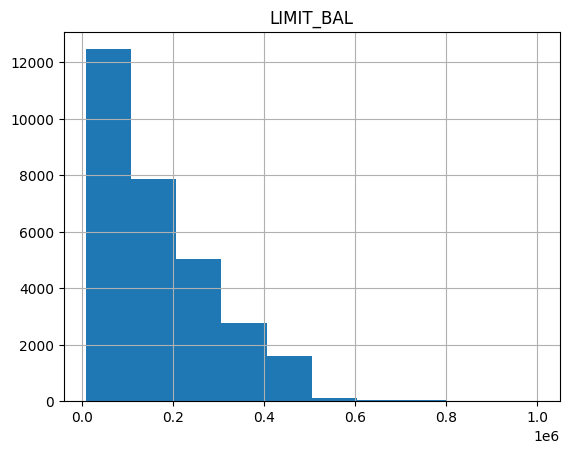

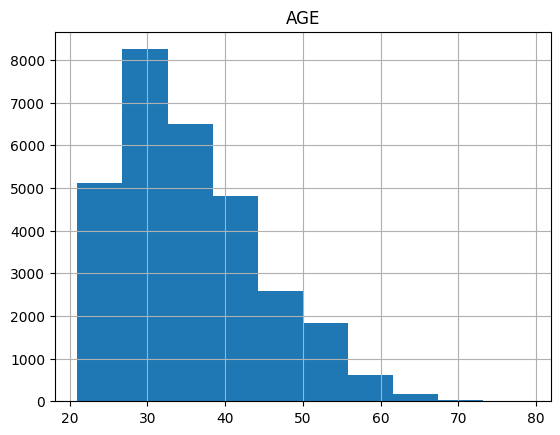

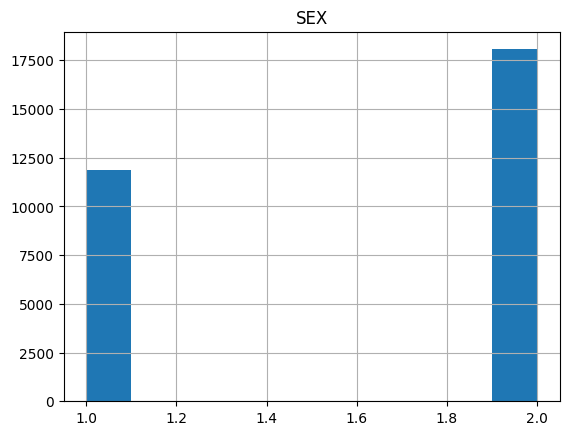

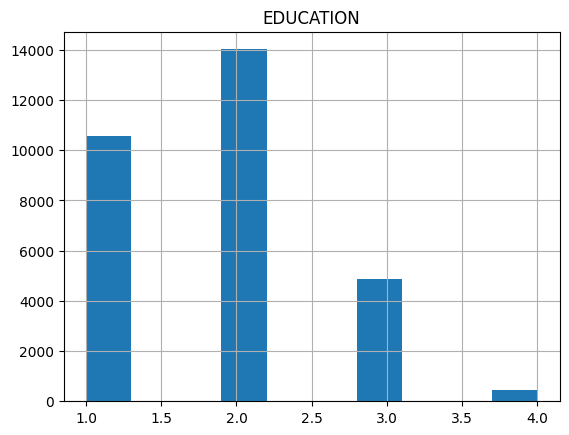

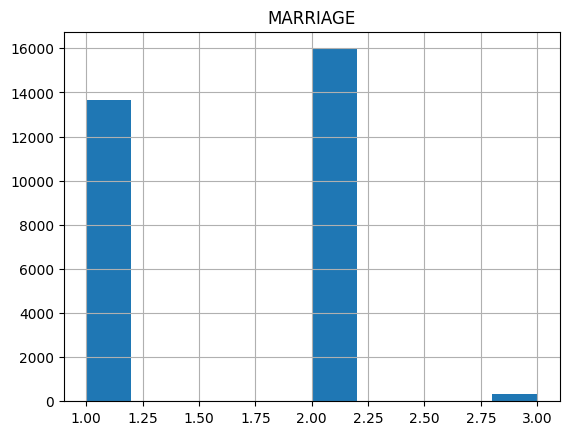

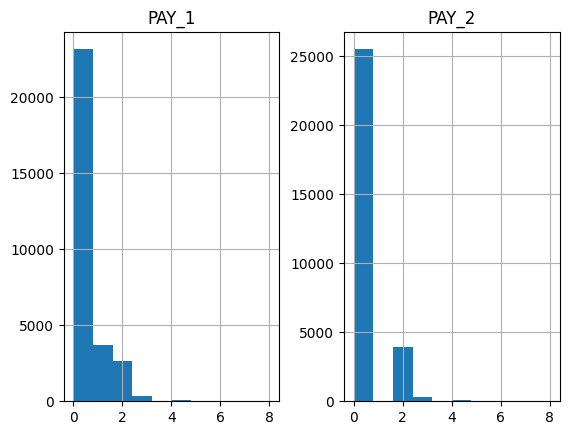

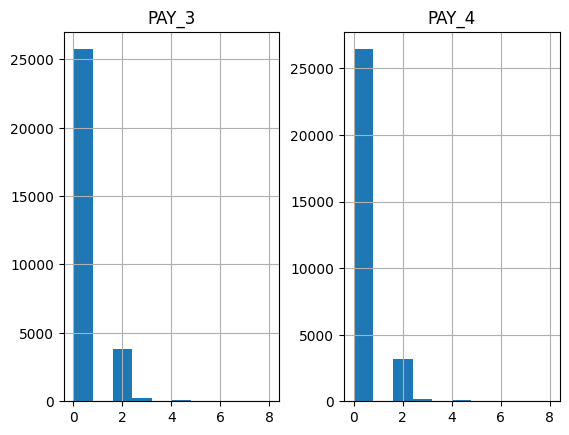

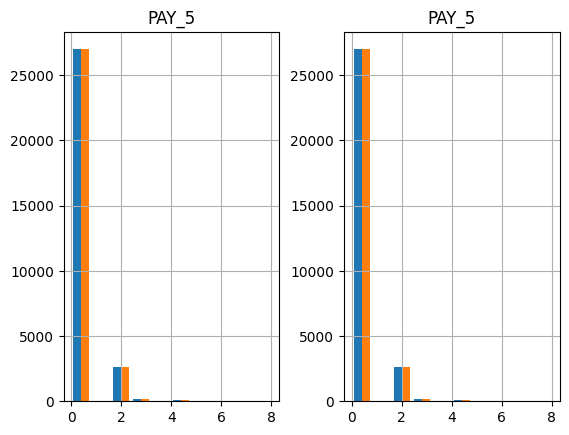

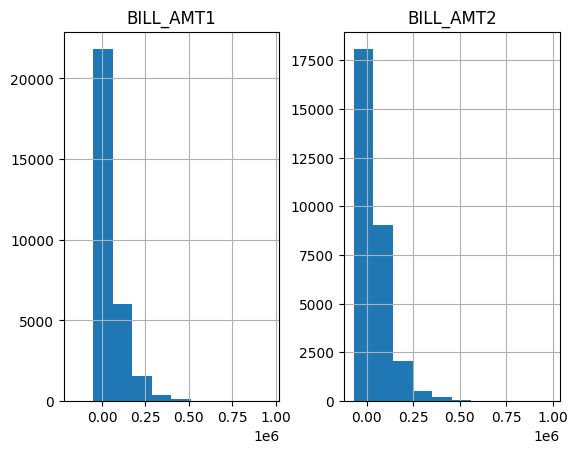

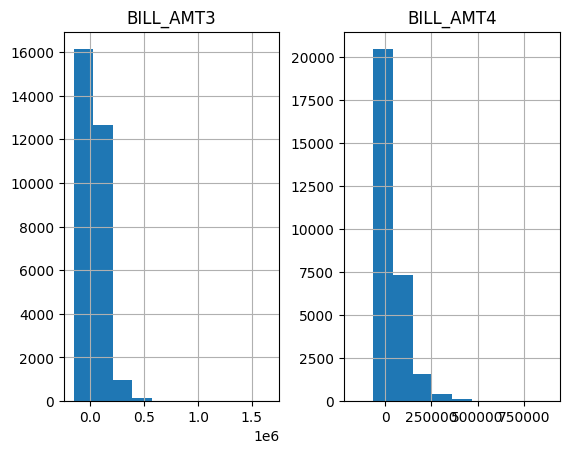

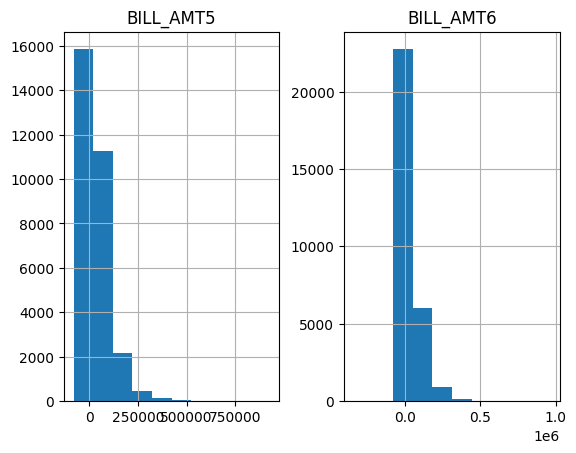

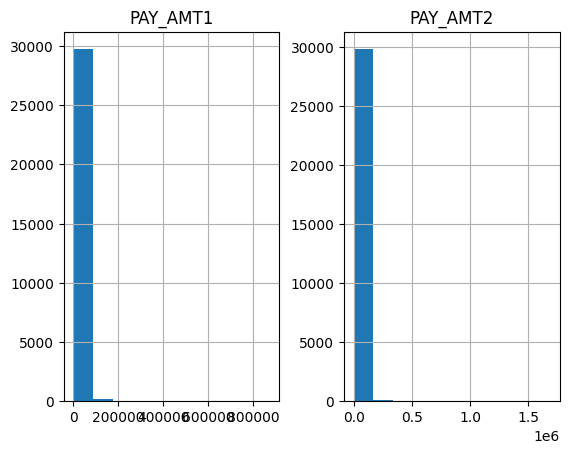

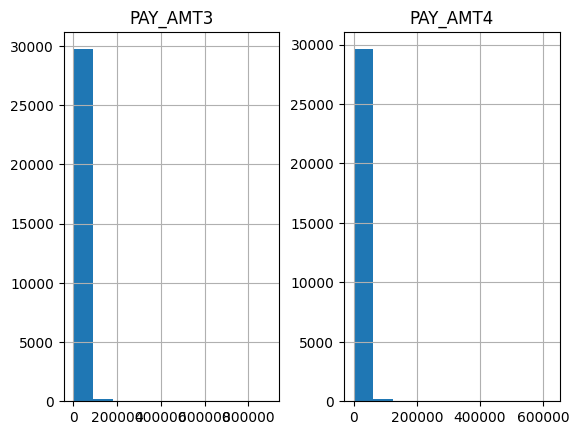

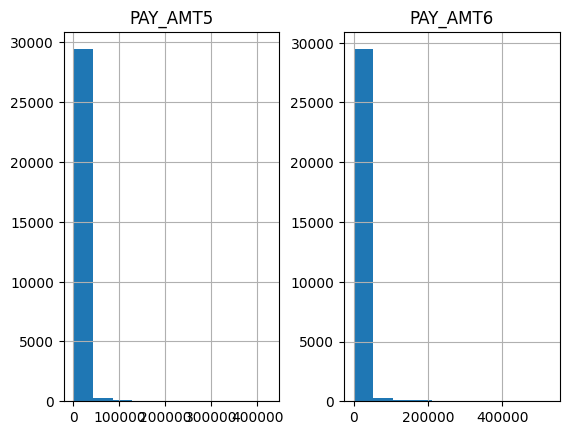

In [15]:
#LIMIT_BAL BAR charts
print(df2[['LIMIT_BAL']].hist(bins=10, alpha=1))

#AGE BAR charts
print(df2[['AGE']].hist(bins=10, alpha=1))
#SEX BAR charts
print(df2[['SEX']].hist(bins=10, alpha=1))
#EDUCATION BAR charts
print(df2[['EDUCATION']].hist(bins=10, alpha=1))
#MARRIAGE BAR charts
print(df2[['MARRIAGE']].hist(bins=10, alpha=1))


#PAY_1 to PAY_6 BAR charts
print(df2[['PAY_1','PAY_2']].hist(bins=10, alpha=1))
print(df2[['PAY_3','PAY_4']].hist(bins=10, alpha=1))
print(df2[['PAY_5','PAY_5']].hist(bins=10, alpha=1))

#BILL_AMT1 to BILL_AMT6 BAR charts
print(df2[['BILL_AMT1','BILL_AMT2']].hist(bins=10, alpha=1))
print(df2[['BILL_AMT3','BILL_AMT4']].hist(bins=10, alpha=1))
print(df2[['BILL_AMT5','BILL_AMT6']].hist(bins=10, alpha=1))
#PAY_AMT1 to PAY_AMT6 BAR charts
print(df2[['PAY_AMT1','PAY_AMT2']].hist(bins=10, alpha=1))
print(df2[['PAY_AMT3','PAY_AMT4']].hist(bins=10, alpha=1))
print(df2[['PAY_AMT5','PAY_AMT6']].hist(bins=10, alpha=1))

Axes(0.125,0.11;0.775x0.77)


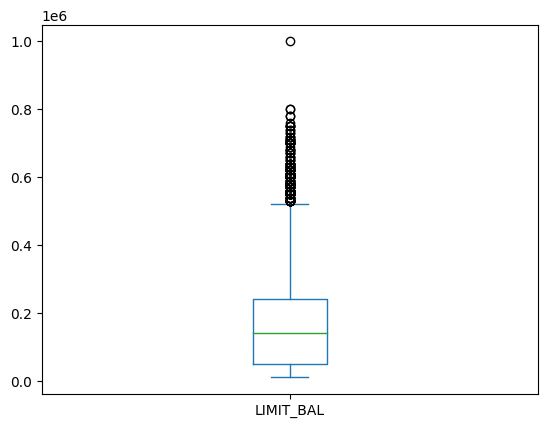

In [19]:
print(df2['LIMIT_BAL'].plot.box())


Axes(0.125,0.11;0.775x0.77)


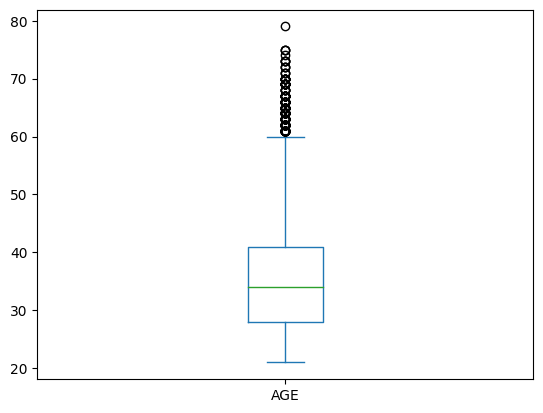

In [20]:

print(df2['AGE'].plot.box())


Axes(0.125,0.11;0.775x0.77)


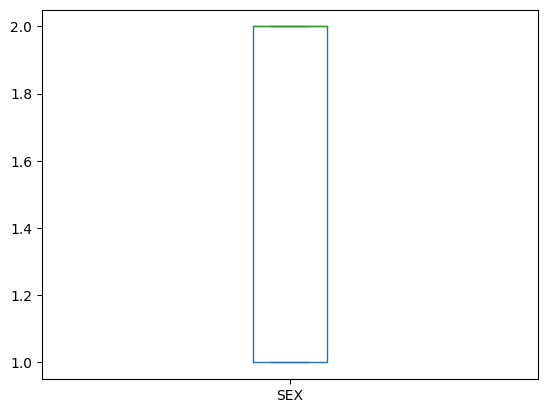

In [21]:
print(df2['SEX'].plot.box())


Axes(0.125,0.11;0.775x0.77)


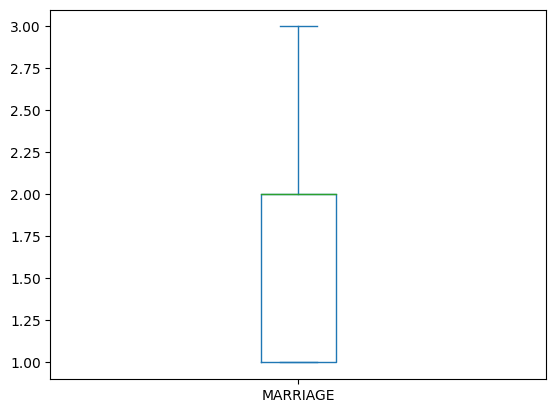

In [22]:
print(df2['MARRIAGE'].plot.box())


Axes(0.125,0.11;0.775x0.77)


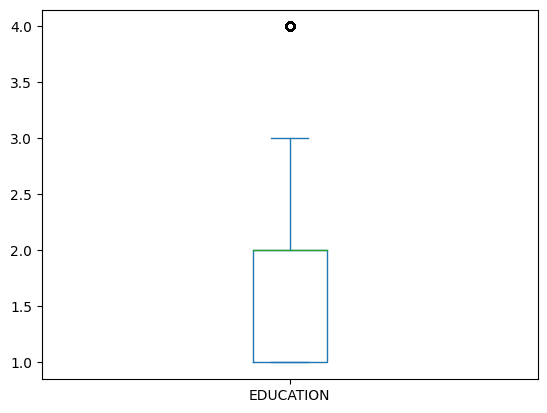

In [23]:
print(df2['EDUCATION'].plot.box())

<ipython-input-24-3eb1f80b6859>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)
<ipython-input-24-3eb1f80b6859>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.LIMIT_BAL)


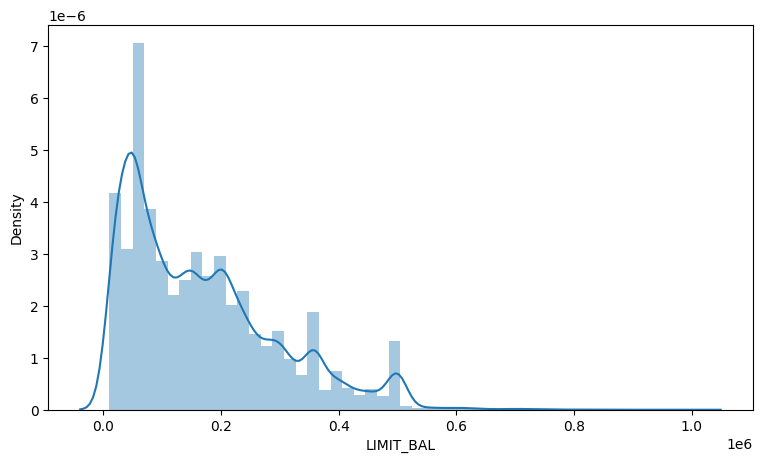

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df2.LIMIT_BAL)


plt.show()

<ipython-input-27-1200cca5c3a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.AGE)


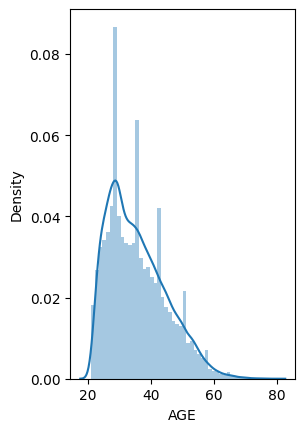

In [27]:
plt.subplot(122)
sns.distplot(df2.AGE)
plt.show()


<ipython-input-25-01bc445327b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.EDUCATION)


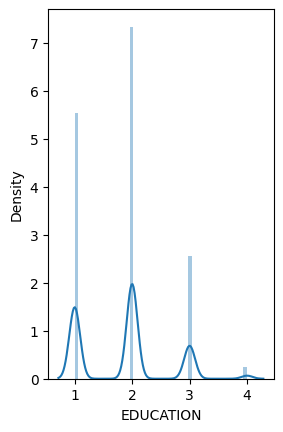

In [25]:
plt.subplot(122)
sns.distplot(df2.EDUCATION)
plt.show()

<ipython-input-26-717f58625892>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.SEX)


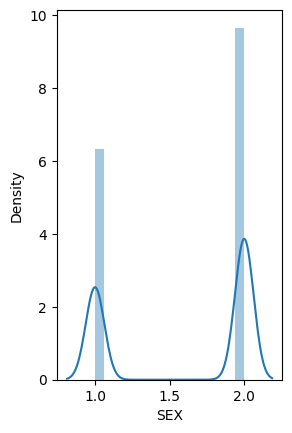

In [26]:
plt.subplot(122)
sns.distplot(df2.SEX)
plt.show()

<ipython-input-28-45f8b3e66573>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.BILL_AMT1)


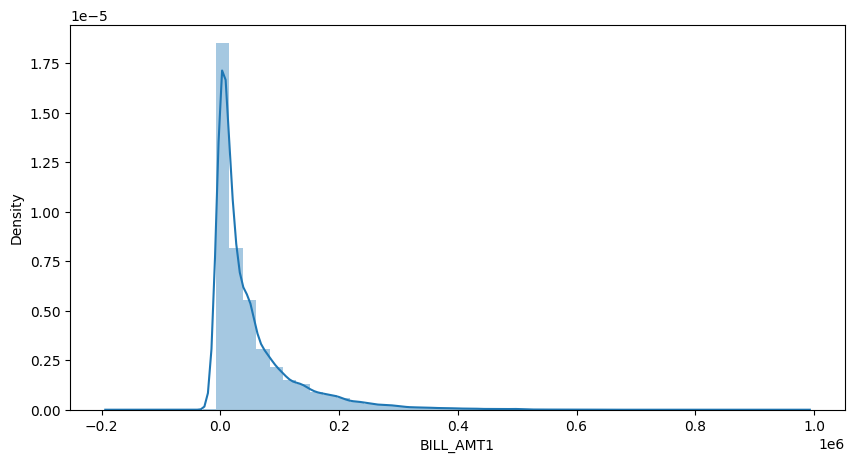

<ipython-input-28-45f8b3e66573>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.BILL_AMT2)


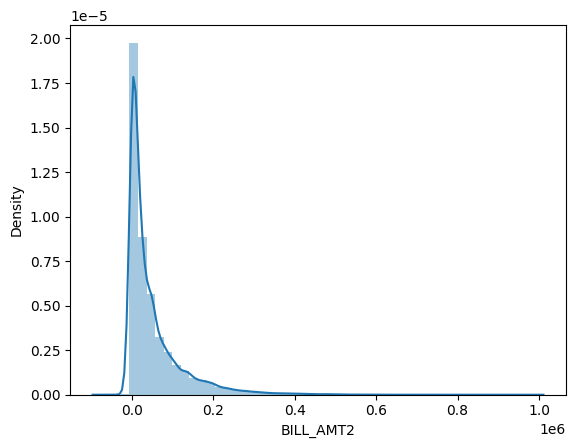

<ipython-input-28-45f8b3e66573>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.BILL_AMT3)


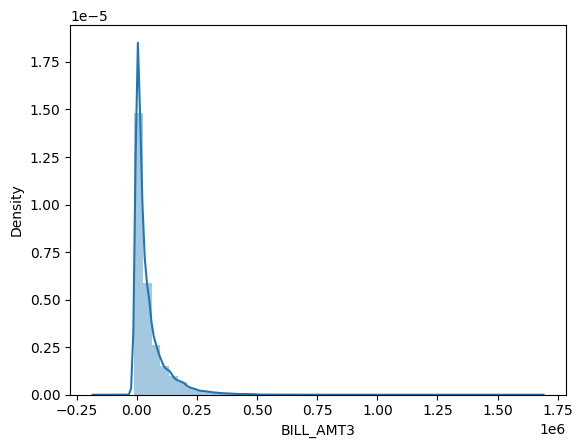

<ipython-input-28-45f8b3e66573>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.BILL_AMT4)


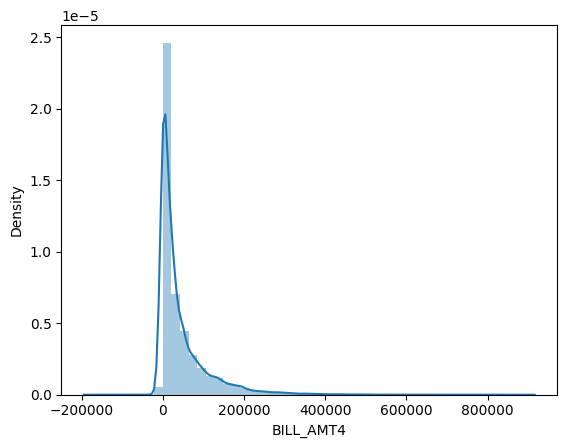

<ipython-input-28-45f8b3e66573>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.BILL_AMT5)


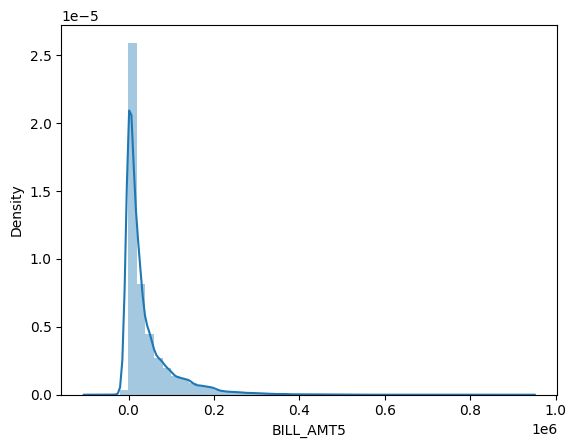

<ipython-input-28-45f8b3e66573>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.BILL_AMT6)


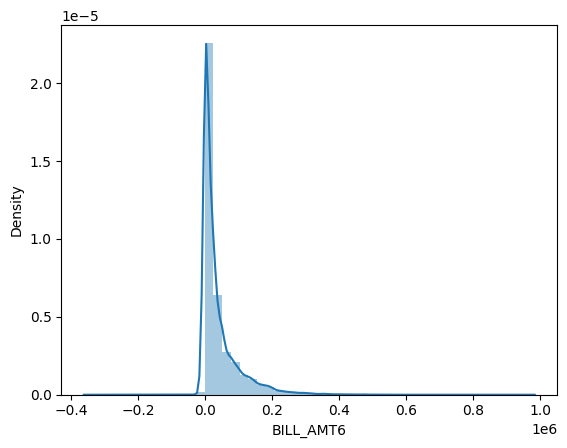

In [28]:
plt.subplots(figsize=(10,5))
plt.subplot(111)
sns.distplot(df2.BILL_AMT1)
plt.show()

sns.distplot(df2.BILL_AMT2)
plt.show()
sns.distplot(df2.BILL_AMT3)
plt.show()
sns.distplot(df2.BILL_AMT4)
plt.show()
sns.distplot(df2.BILL_AMT5)
plt.show()
sns.distplot(df2.BILL_AMT6)
plt.show()

<Axes: >

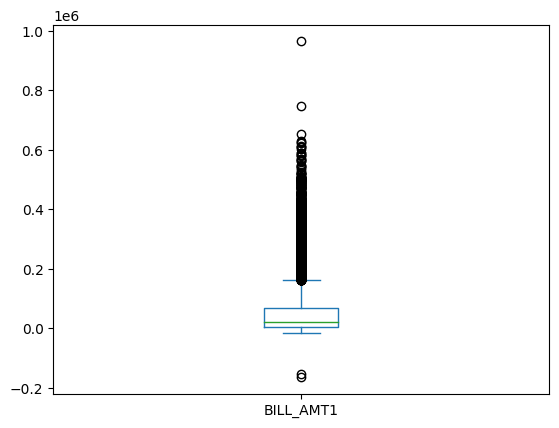

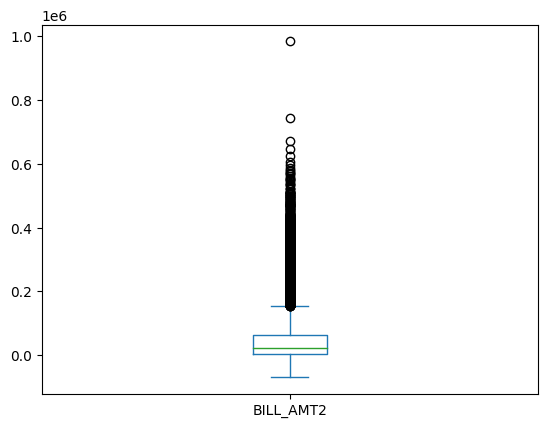

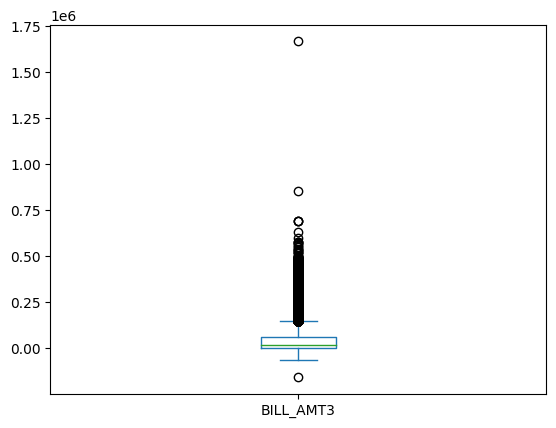

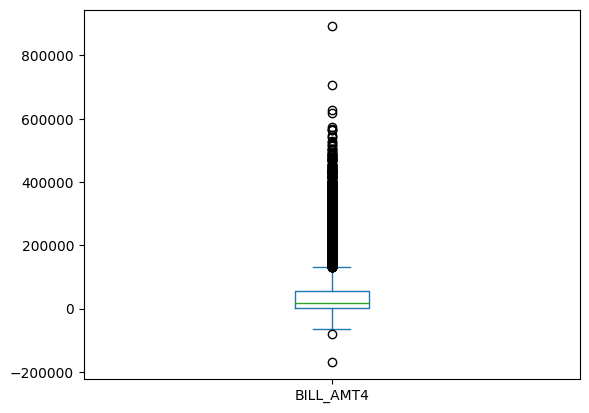

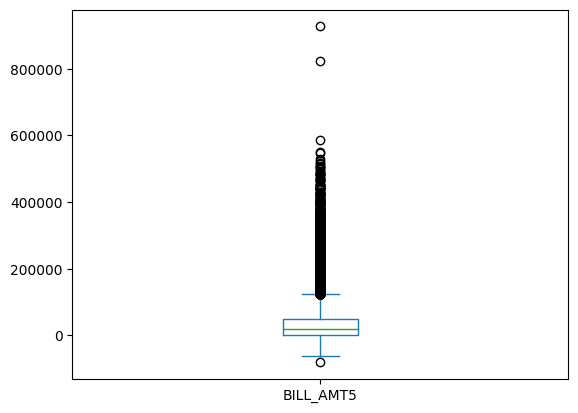

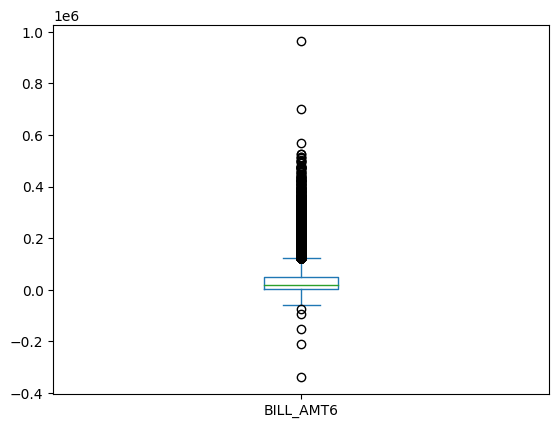

In [29]:
df2[['BILL_AMT1']].plot.box()
df2[['BILL_AMT2']].plot.box()
df2[['BILL_AMT3']].plot.box()
df2[['BILL_AMT4']].plot.box()
df2[['BILL_AMT5']].plot.box()
df2[['BILL_AMT6']].plot.box()

<Axes: >

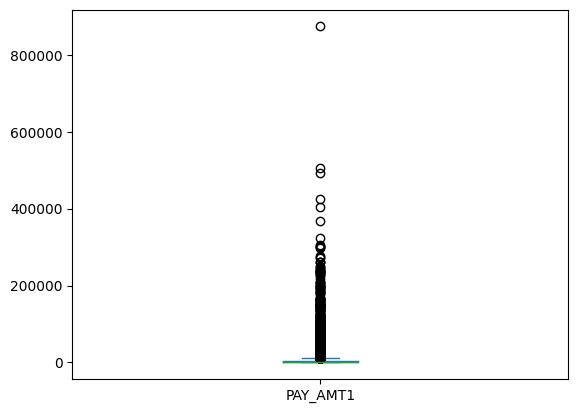

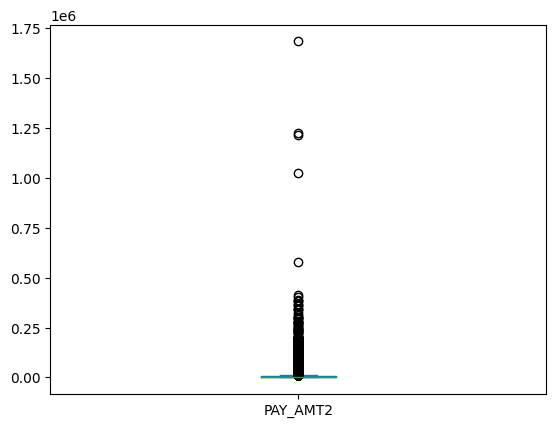

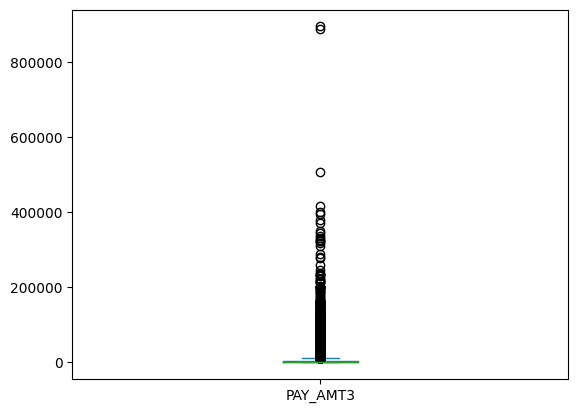

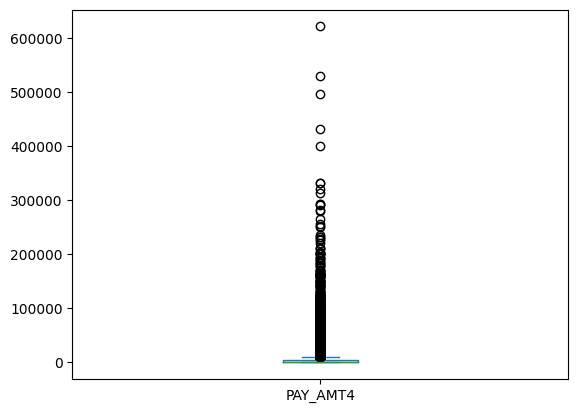

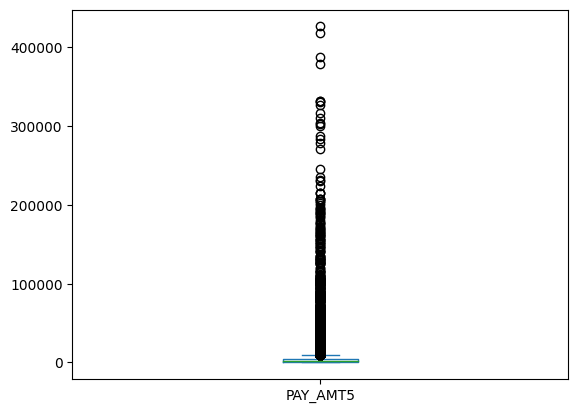

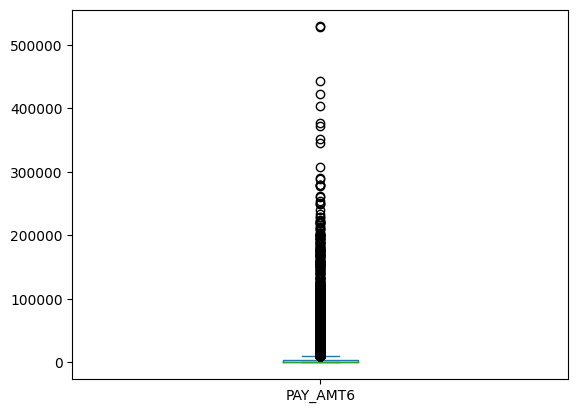

In [30]:
df2[['PAY_AMT1']].plot.box()
df2[['PAY_AMT2']].plot.box()
df2[['PAY_AMT3']].plot.box()
df2[['PAY_AMT4']].plot.box()
df2[['PAY_AMT5']].plot.box()
df2[['PAY_AMT6']].plot.box()



In [31]:
pd.crosstab(df2['BILL_AMT1'], df2['PAY_AMT1'])

PAY_AMT1,0,1,2,3,4,5,6,7,8,9,...,300039,302000,304815,323014,368199,405016,423903,493358,505000,873552
BILL_AMT1,,,,,,,,,,,,,,,,,,,,,
-165580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
-154973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-15308,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
-14386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-11545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data imbalance

Axes(0.125,0.11;0.775x0.77)


0.22153548042229051

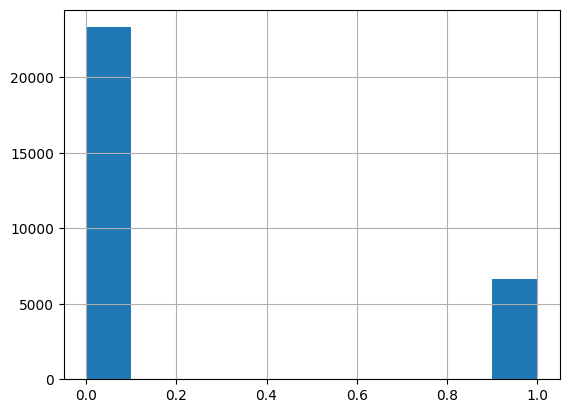

In [40]:
print(df2['default payment next month'].hist())
Default_ratio=df2['default payment next month'].value_counts()[1]/df2['default payment next month'].count()
Default_ratio

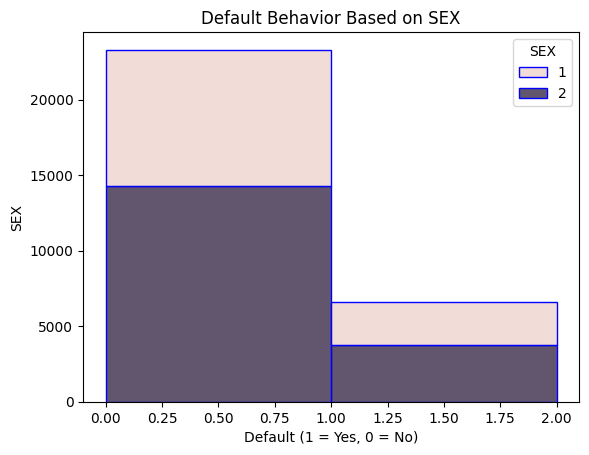

default payment next month,0,1
SEX,,
1,8995,2871
2,14306,3760


In [41]:
#Data balance identification based on dependent variable default payment

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df2, x='default payment next month', hue='SEX', multiple='stack', bins=[0, 1, 2], edgecolor='b')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('SEX')
plt.title('Default Behavior Based on SEX')

plt.show()

pd.crosstab(df2['SEX'], df2['default payment next month'])

Outlier Consideration

In [39]:
#outlier consideration

df2[df2.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2','PAY_AMT1', 'BILL_AMT1']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1
2687,500000,0,0,367979,368199,71921
5687,480000,0,0,400000,302000,106660
8500,400000,0,0,405016,405016,6500
12330,300000,1,0,324392,505000,-165580
25431,170000,0,0,167941,304815,30860
28003,510000,0,0,481382,493358,71121
28716,340000,0,0,176743,873552,139808
29820,400000,1,0,394858,423903,396343
29867,340000,0,0,331641,300039,44855
29963,610000,0,0,322228,323014,348392


Cleaned Data exported to CSV file

In [42]:
file_path = '/content/card_default_cleaned.csv'

# Export the DataFrame to CSV
df2.to_csv(file_path, index=False)

print(f"DataFrame 'df2' has been successfully exported to: {file_path}")

DataFrame 'df2' has been successfully exported to: /content/card_default_cleaned.csv


Correlation Analysis

0.1448024855792761


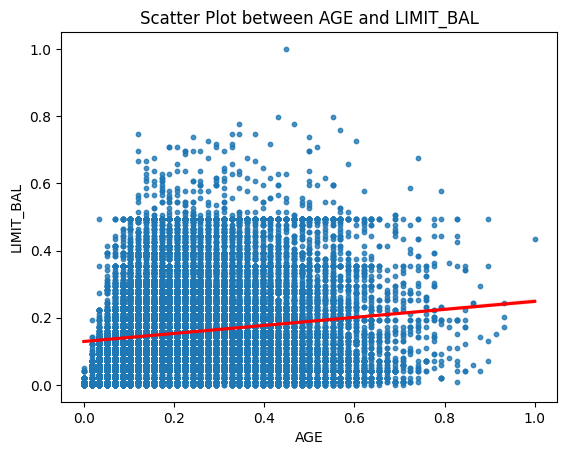

-0.2317397640347224


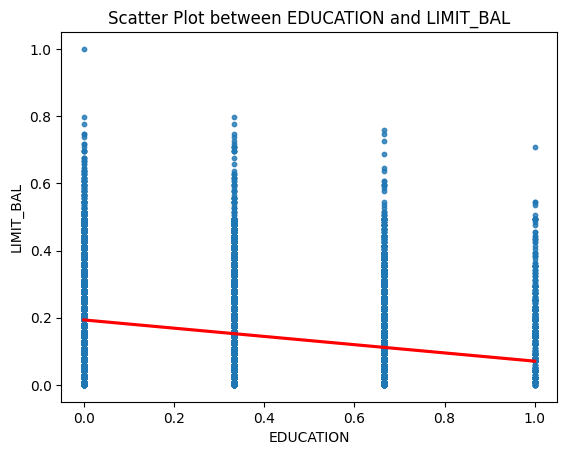

-0.1106832473738504


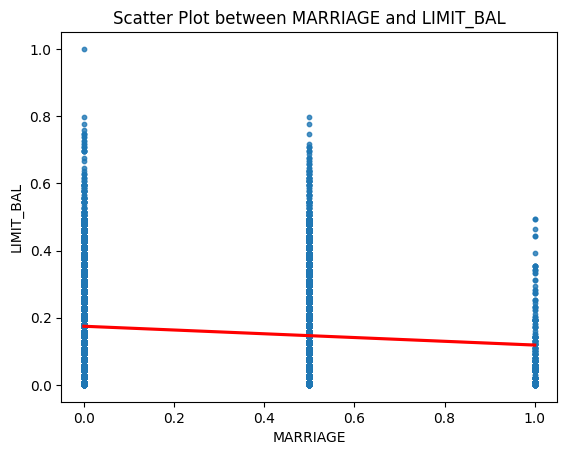

0.024952818456164105


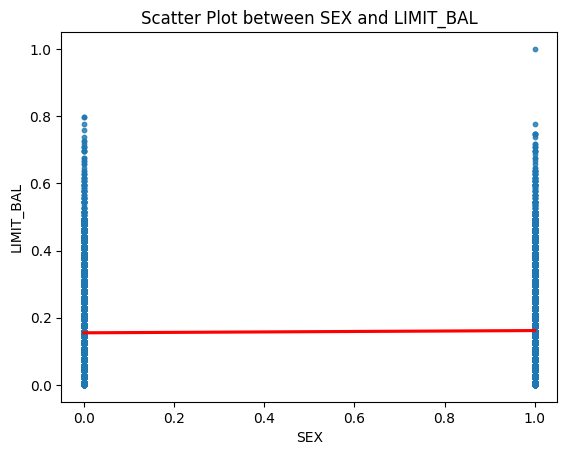

In [32]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)
df2_normalized = pd.DataFrame(df2_scaled, columns=df2.columns)

pearson_corr = df2_normalized['AGE'].corr(df2_normalized['LIMIT_BAL'])

print(pearson_corr)

sns.regplot(x='AGE', y='LIMIT_BAL', data=df2_normalized, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('AGE')
plt.ylabel('LIMIT_BAL')
plt.title('Scatter Plot between AGE and LIMIT_BAL')
plt.show()


pearson_corr = df2_normalized['EDUCATION'].corr(df2_normalized['LIMIT_BAL'])

print(pearson_corr)
sns.regplot(x='EDUCATION', y='LIMIT_BAL', data=df2_normalized, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('EDUCATION')
plt.ylabel('LIMIT_BAL')
plt.title('Scatter Plot between EDUCATION and LIMIT_BAL')
plt.show()

pearson_corr = df2_normalized['MARRIAGE'].corr(df2_normalized['LIMIT_BAL'])

print(pearson_corr)
sns.regplot(x='MARRIAGE', y='LIMIT_BAL', data=df2_normalized, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('MARRIAGE')
plt.ylabel('LIMIT_BAL')
plt.title('Scatter Plot between MARRIAGE and LIMIT_BAL')
plt.show()

pearson_corr = df2_normalized['SEX'].corr(df2_normalized['LIMIT_BAL'])

print(pearson_corr)
sns.regplot(x='SEX', y='LIMIT_BAL', data=df2_normalized, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('SEX')
plt.ylabel('LIMIT_BAL')
plt.title('Scatter Plot between SEX and LIMIT_BAL')
plt.show()


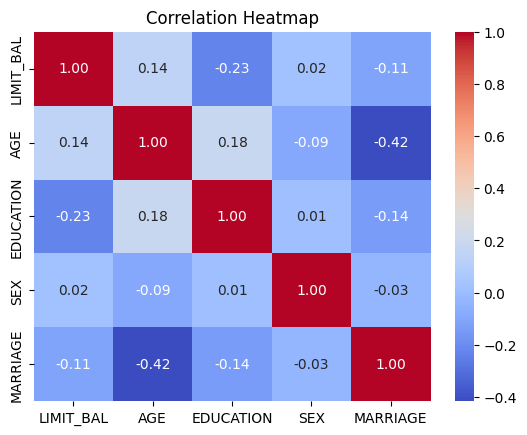

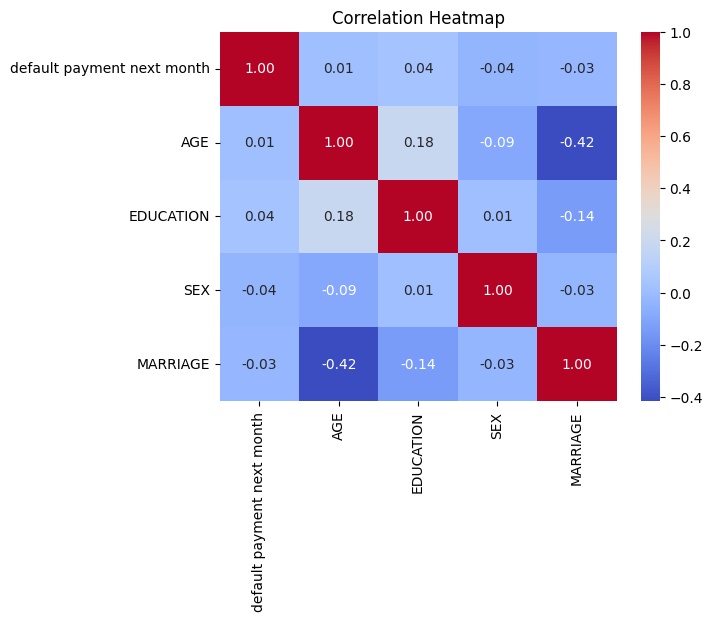

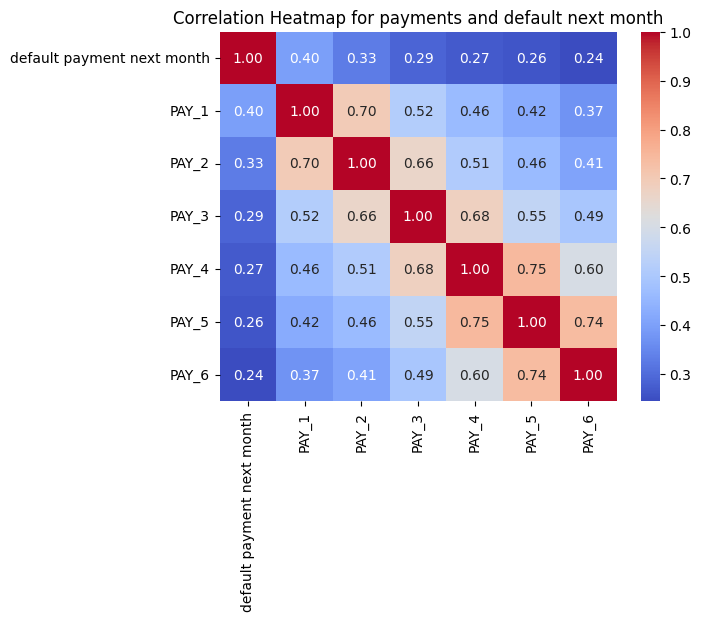

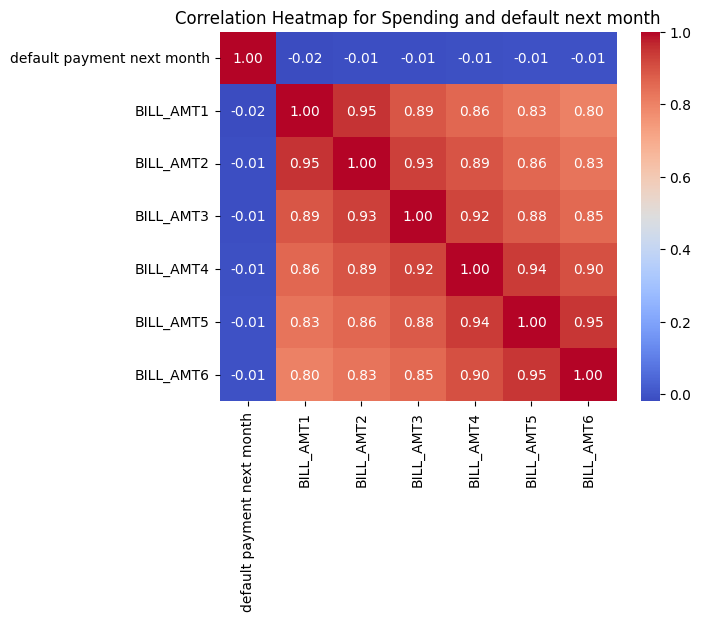

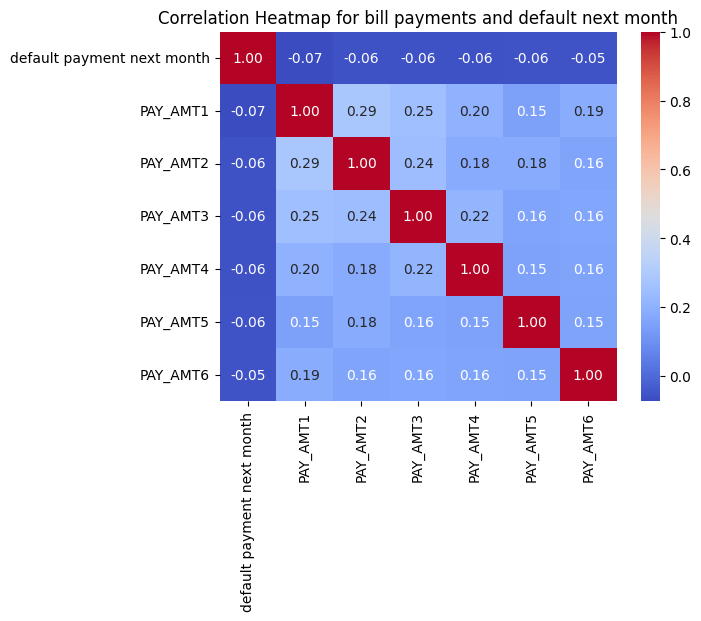

In [34]:
from sklearn.preprocessing import StandardScaler
heatmap_data1 = df2_normalized[['LIMIT_BAL', 'AGE','EDUCATION','SEX','MARRIAGE']]

# Create a heatmap for the correlation
correlation_matrix = heatmap_data1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

heatmap_data2 = df2_normalized[['default payment next month', 'AGE','EDUCATION','SEX','MARRIAGE']]

correlation_matrix = heatmap_data2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

#Payment pattern and default next month correlation for PCA

heatmap_data2 = df2_normalized[['default payment next month', 'PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]

correlation_matrix = heatmap_data2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.title("Correlation Heatmap for payments and default next month")
plt.show()


heatmap_data2 = df2_normalized[['default payment next month','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]

correlation_matrix = heatmap_data2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.title("Correlation Heatmap for Spending and default next month")
plt.show()


heatmap_data2 = df2_normalized[['default payment next month','PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
correlation_matrix = heatmap_data2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.title("Correlation Heatmap for bill payments and default next month")
plt.show()


Pair Plot for demographic variables

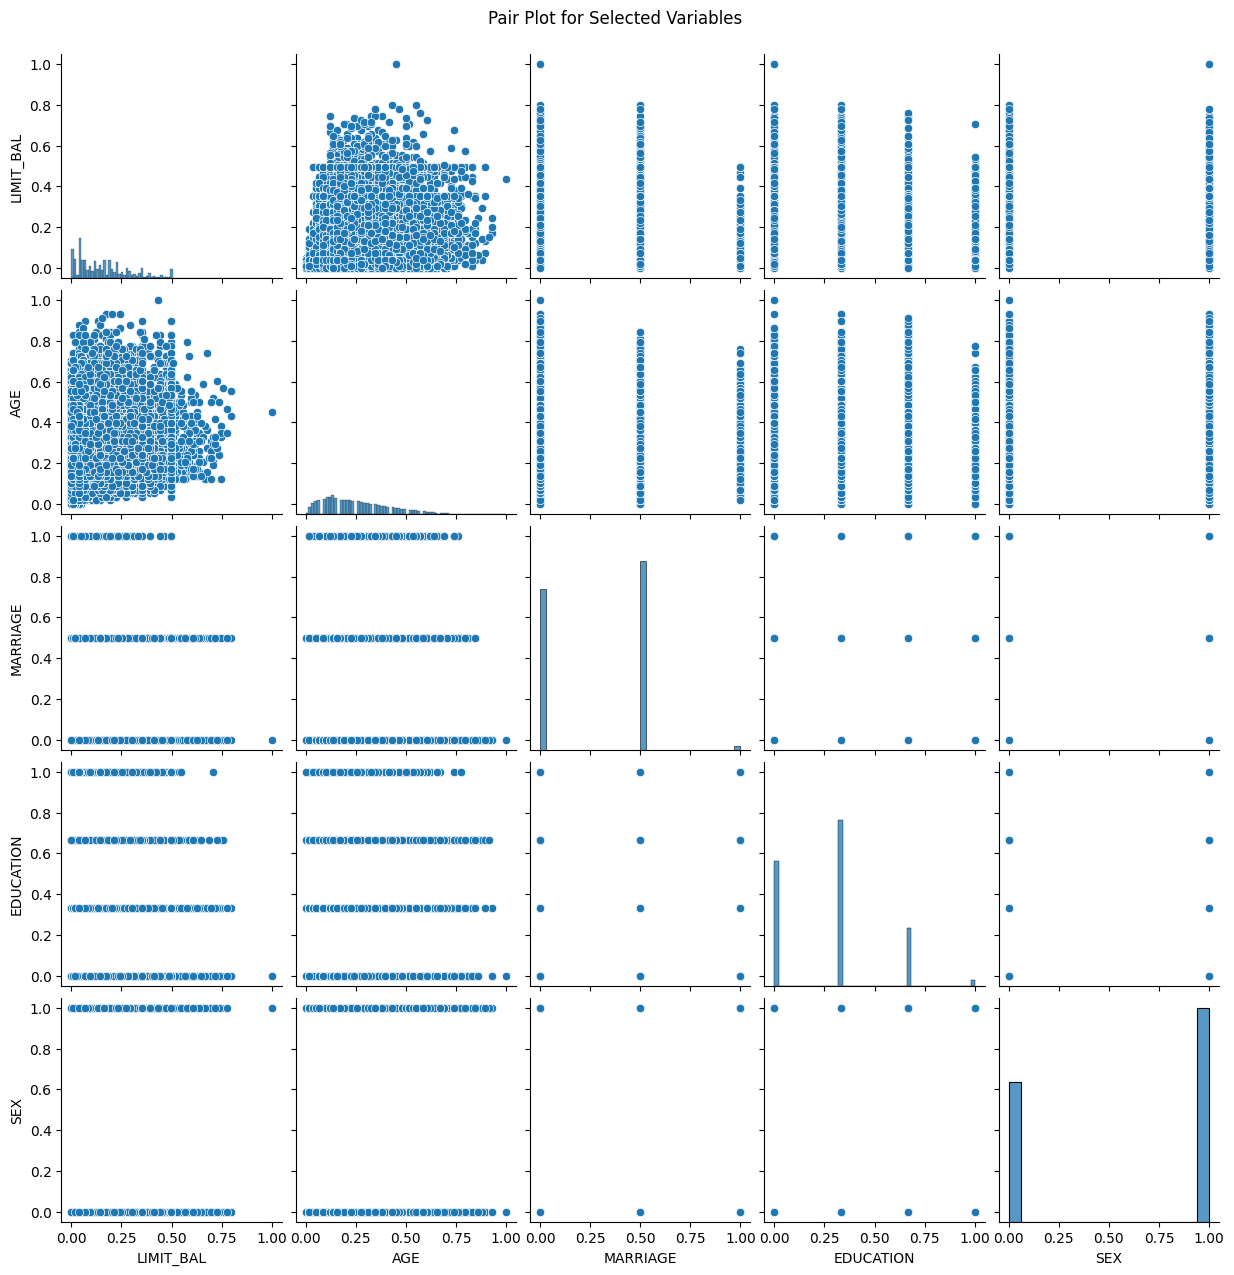

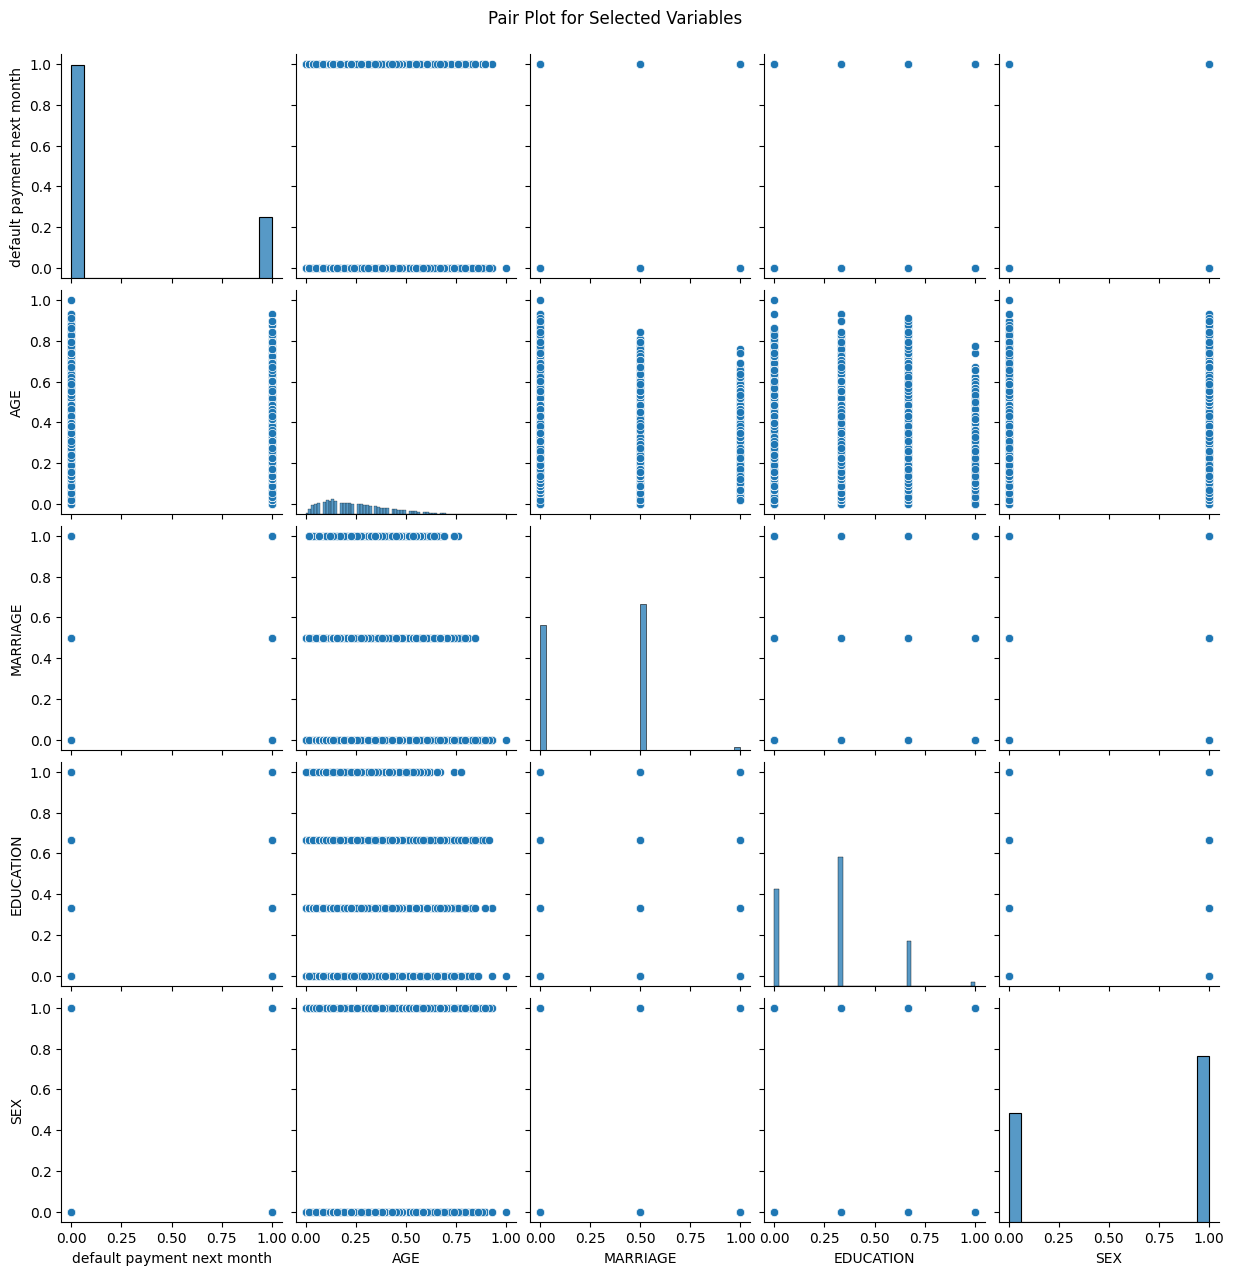

In [35]:
#creating pair plot of Demographic variables, LIMIT_BAL and default payment next month
selected_columns = ['LIMIT_BAL','AGE', 'MARRIAGE','EDUCATION','SEX']
pair_plot_data = df2_normalized[selected_columns]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle("Pair Plot for Selected Variables", y=1.02)
plt.show()

selected_columns2 = ['default payment next month','AGE', 'MARRIAGE','EDUCATION','SEX']
pair_plot_data = df2_normalized[selected_columns2]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle("Pair Plot for Selected Variables", y=1.02)
plt.show()



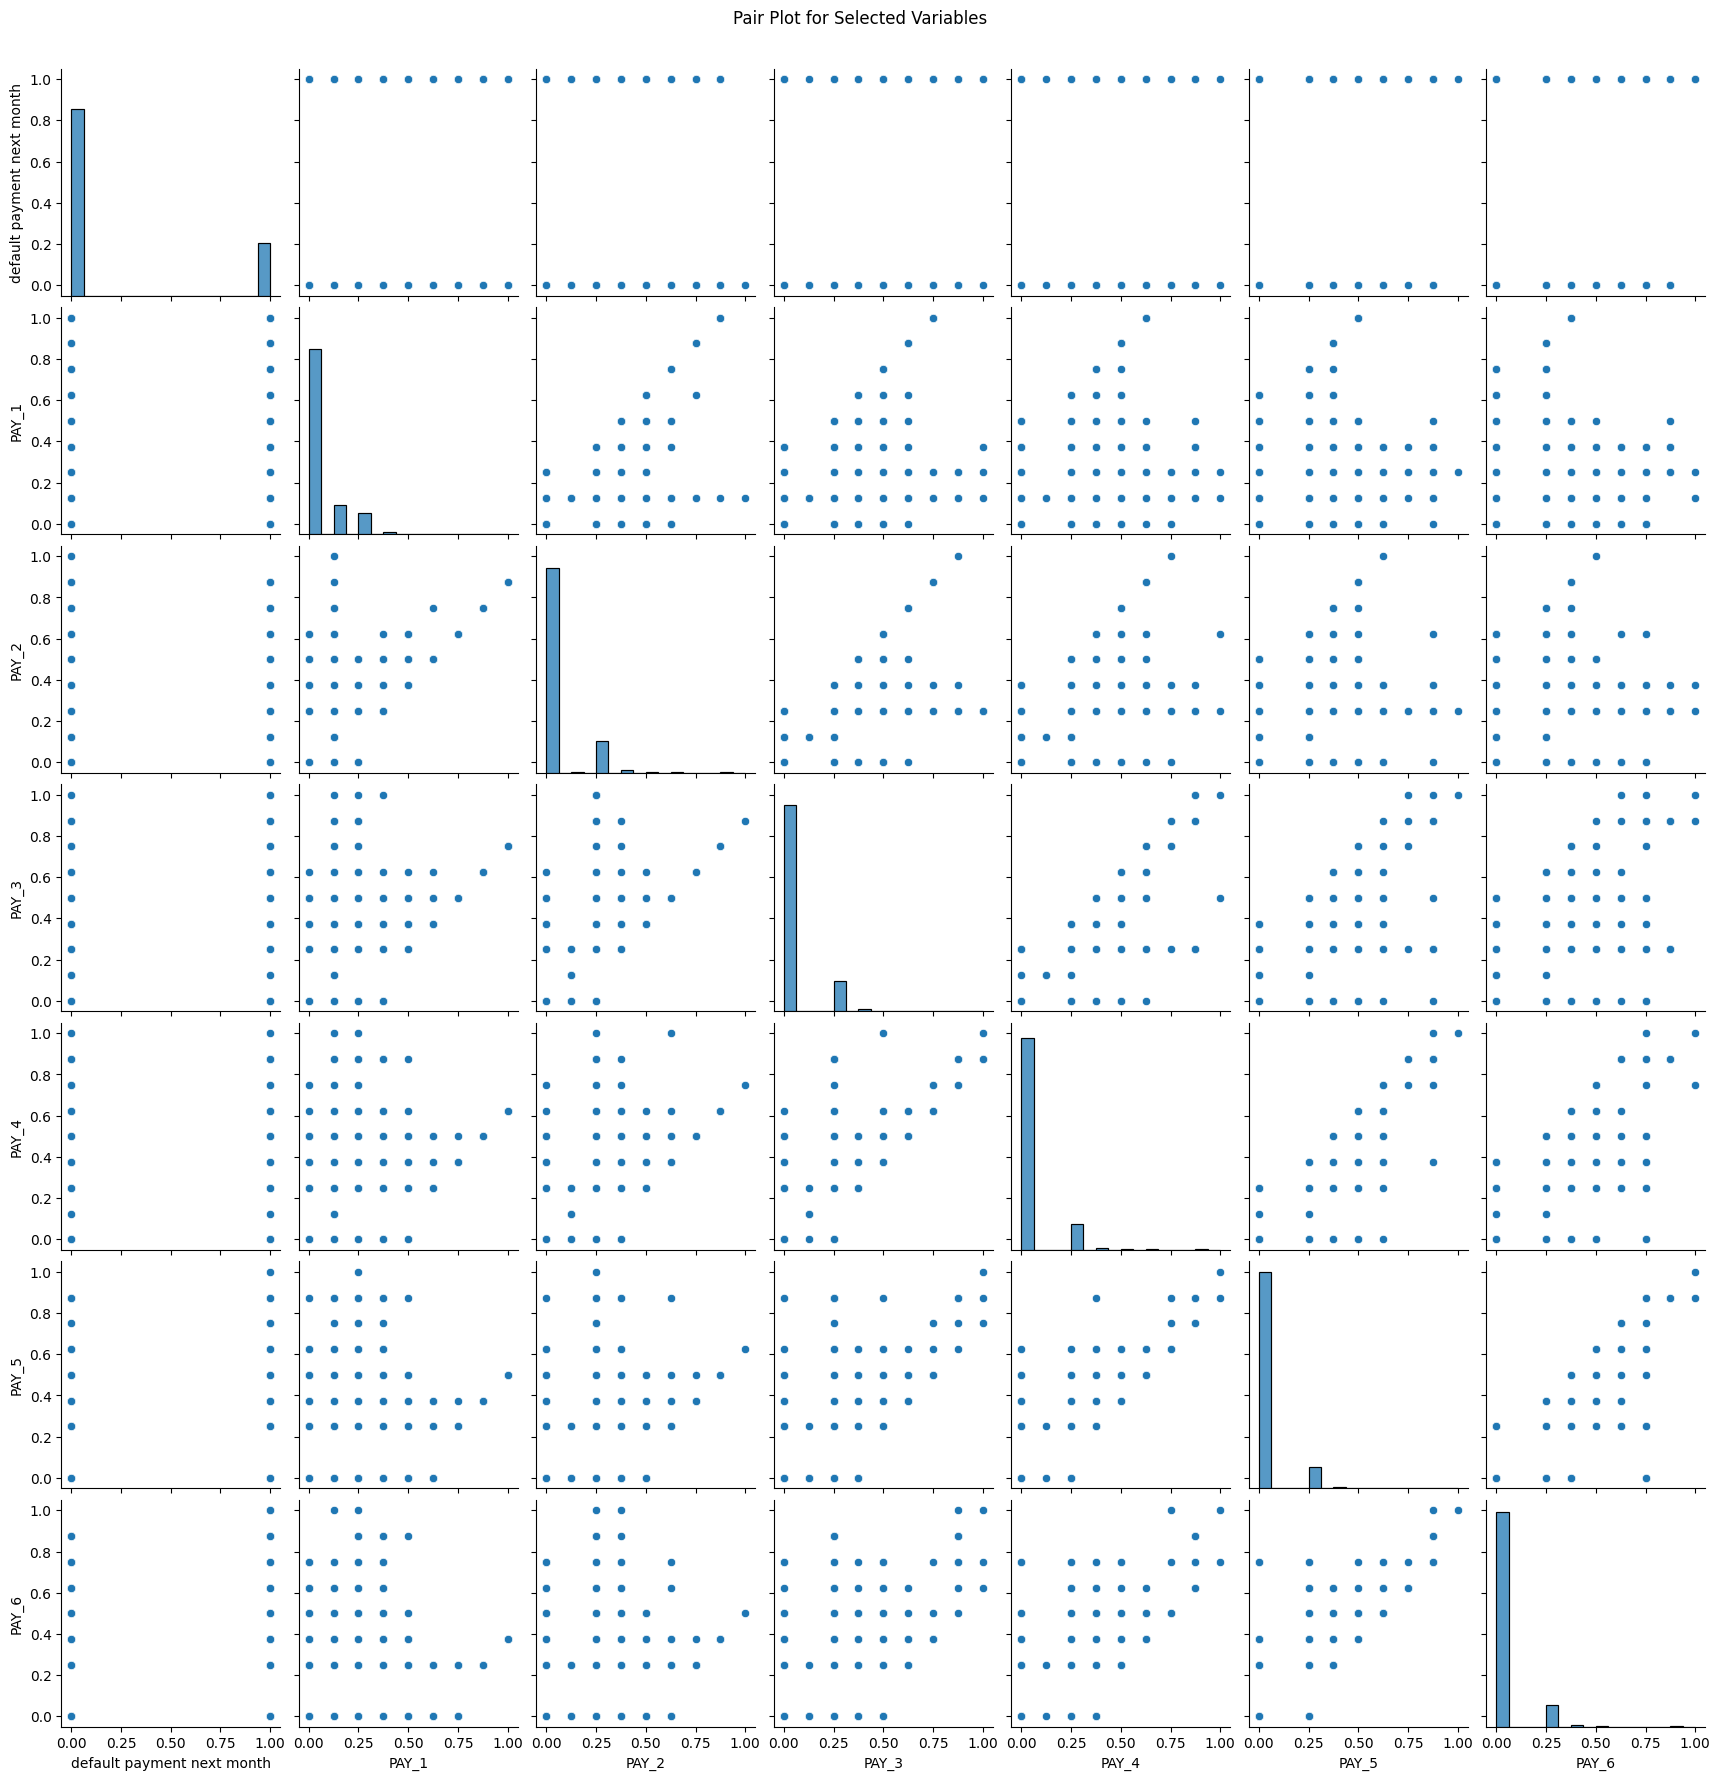

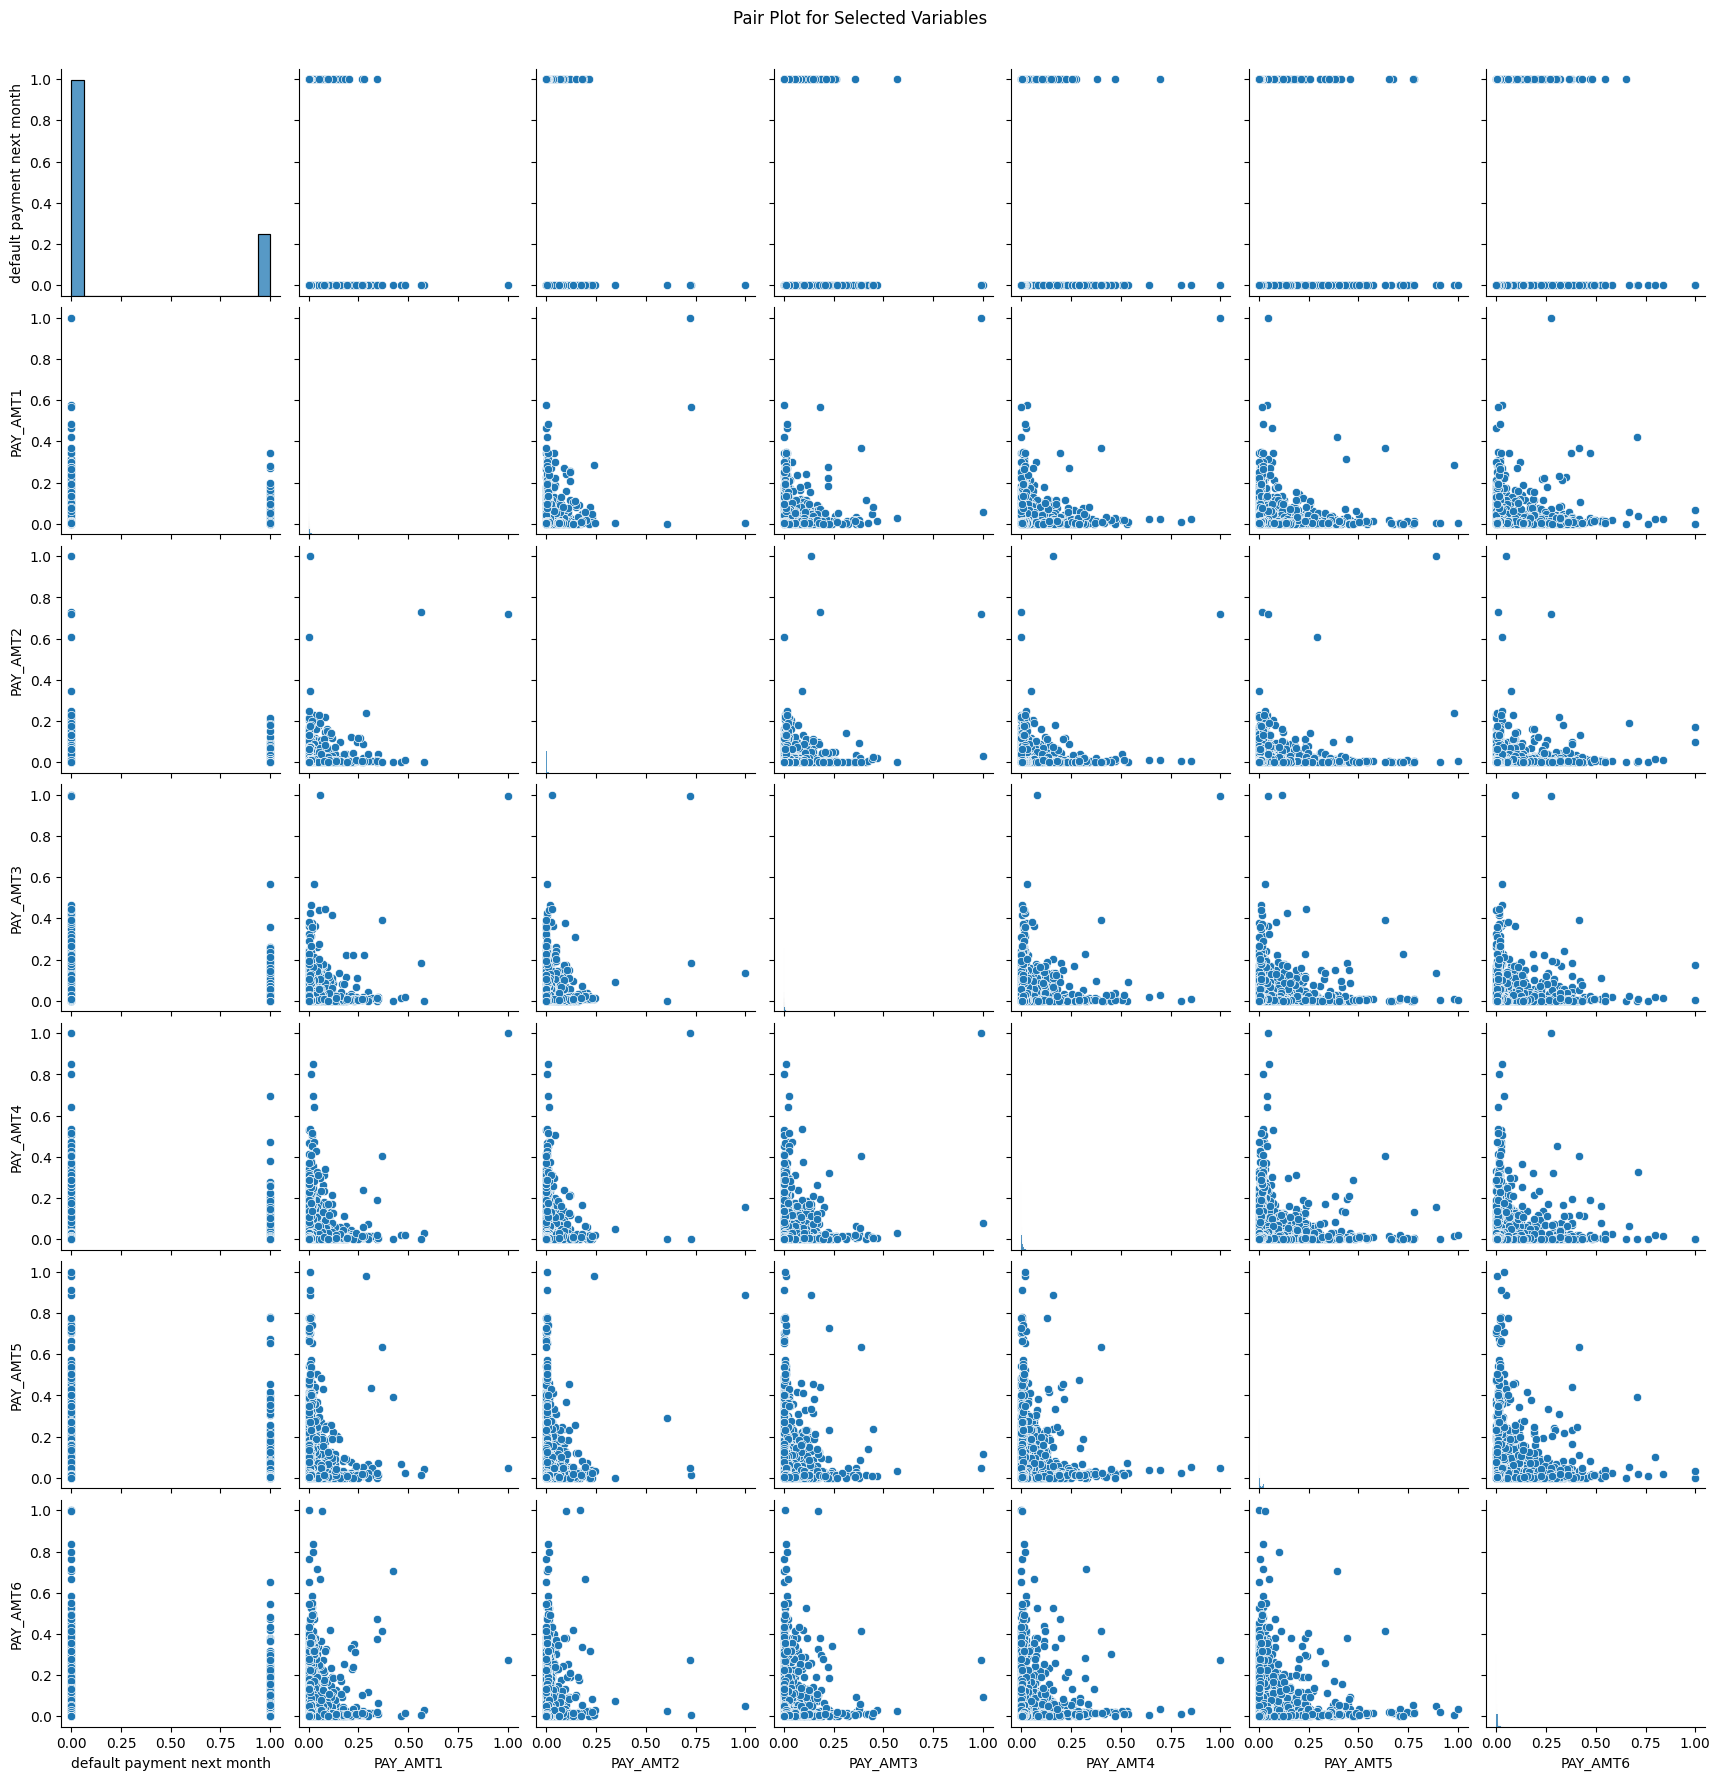

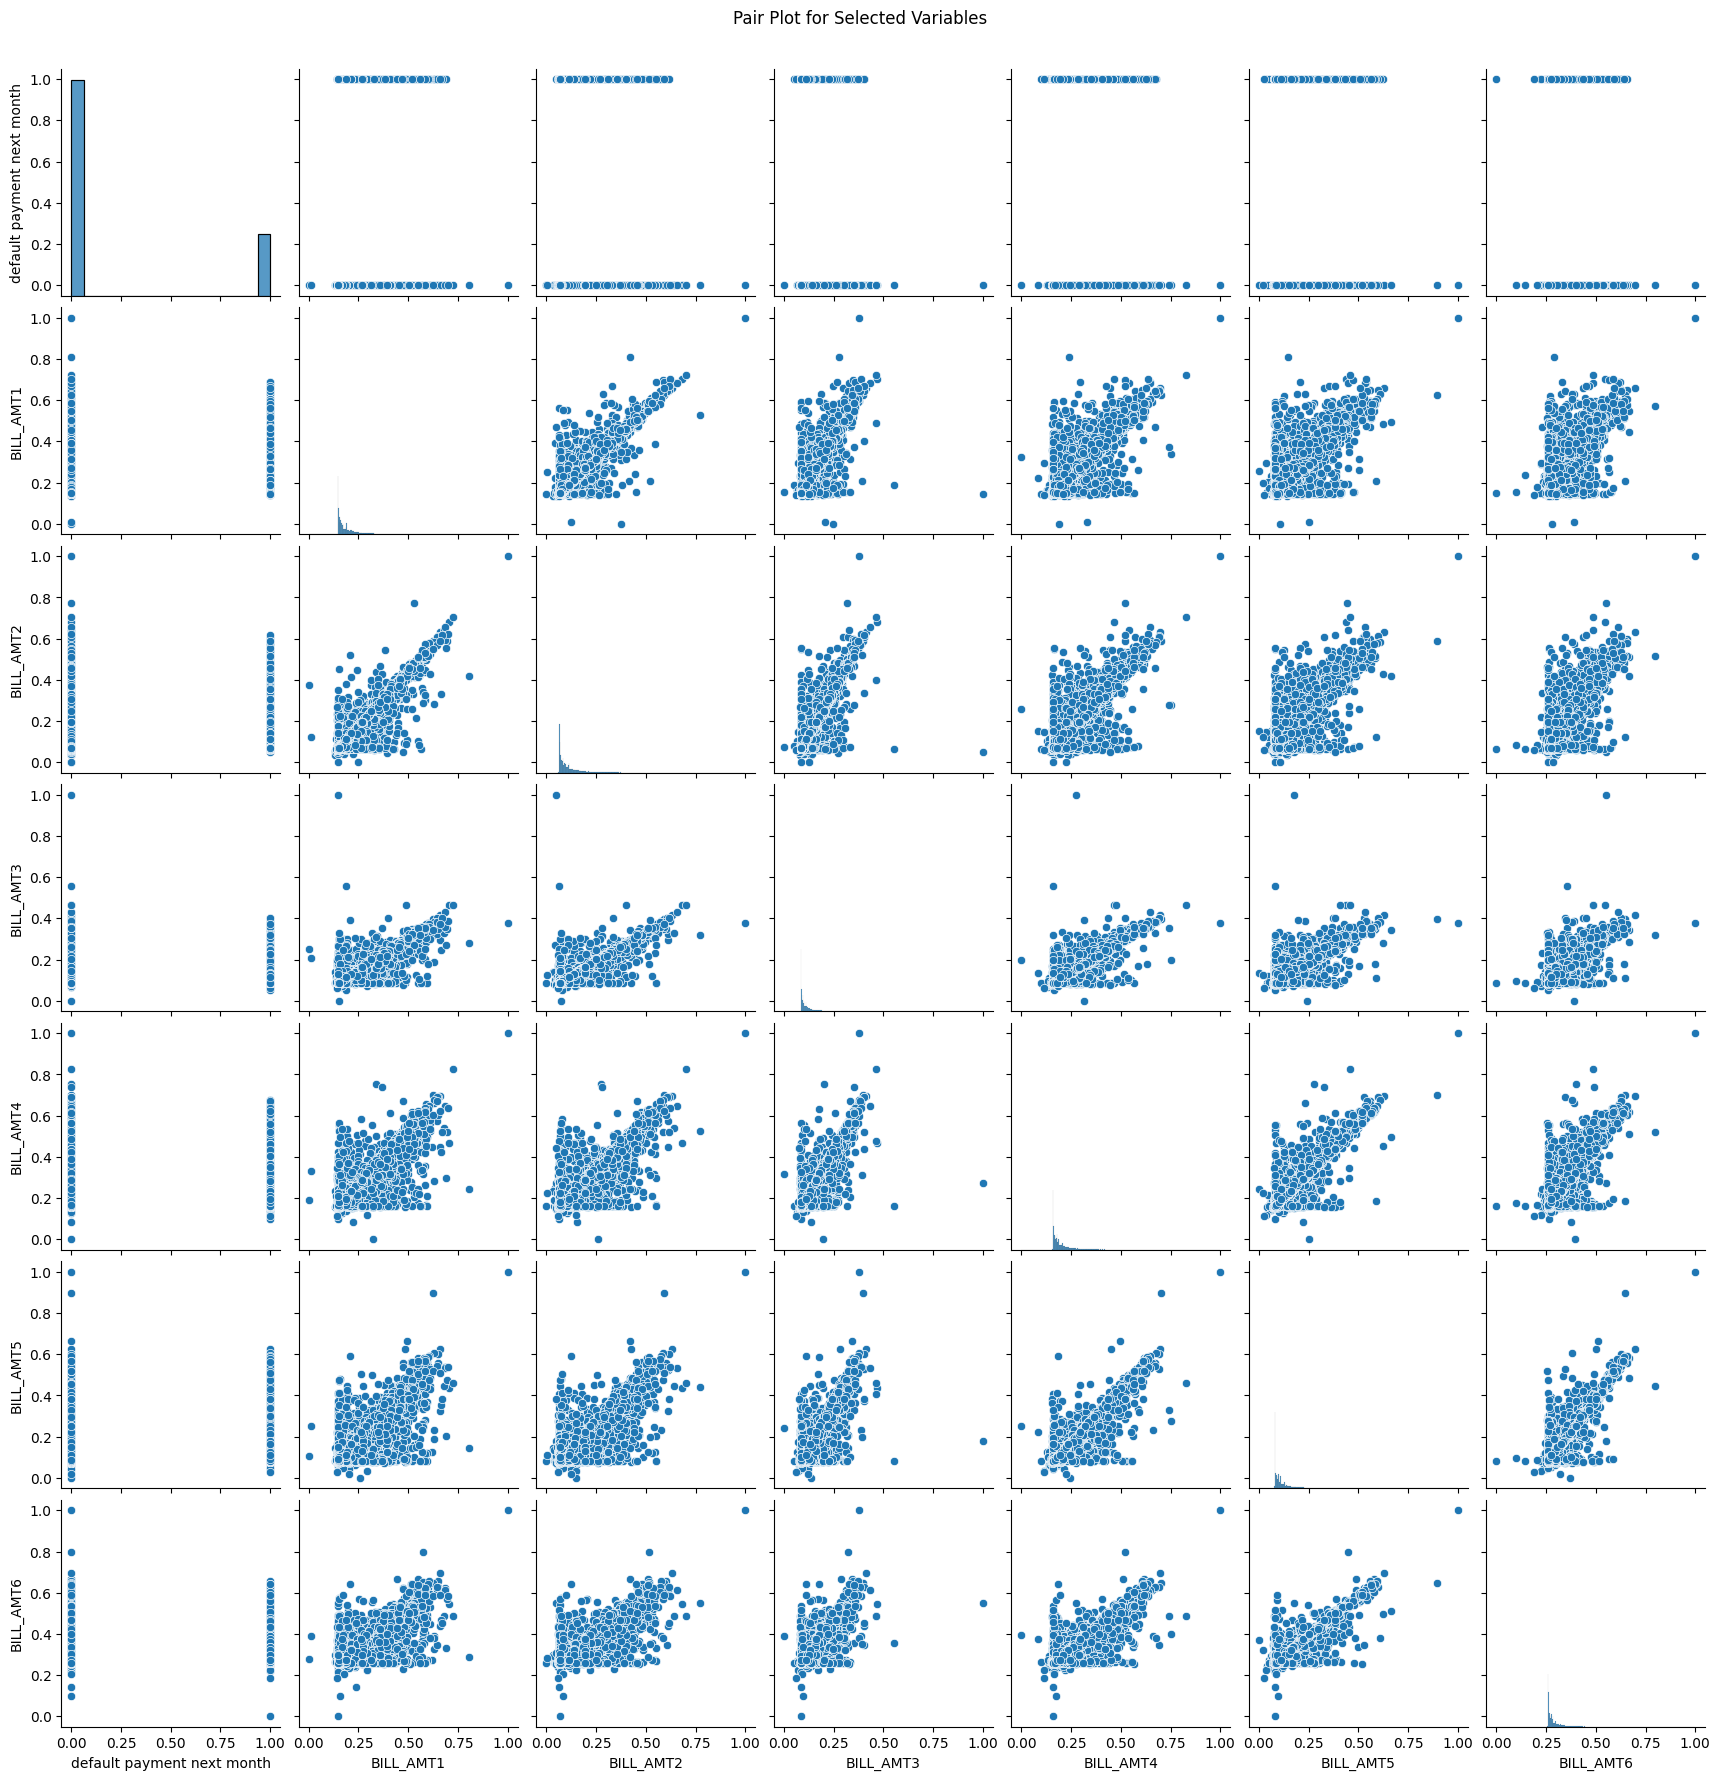

In [36]:
#creating pair plot of payment behavior and default payment next month
selected_columns3 = ['default payment next month','PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
pair_plot_data = df2_normalized[selected_columns3]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle("Pair Plot for Selected Variables", y=1.02)
plt.show()

selected_columns4 = ['default payment next month','PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
pair_plot_data = df2_normalized[selected_columns4]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle("Pair Plot for Selected Variables", y=1.02)
plt.show()



selected_columns5 = ['default payment next month','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pair_plot_data = df2_normalized[selected_columns5]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle("Pair Plot for Selected Variables", y=1.02)
plt.show()

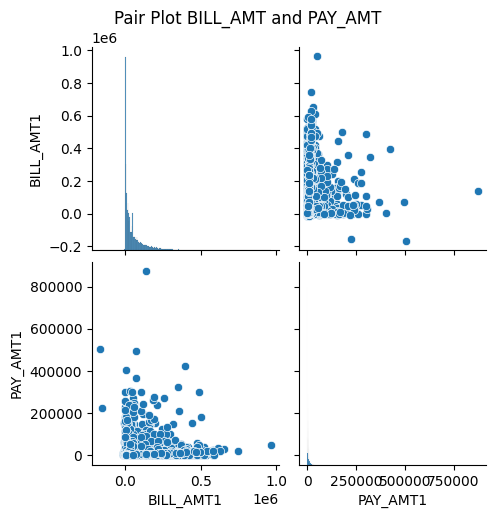

In [37]:
selected_columns = ['BILL_AMT1','PAY_AMT1']
pair_plot_data = df2[selected_columns]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle("Pair Plot BILL_AMT and PAY_AMT", y=1.02)
plt.show()





Principal Component Analysis

   LIMIT_BAL   AGE  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
0    20000.0  24.0        2.0       1.0    2.0    2.0    0.0    0.0    0.0   
1   120000.0  26.0        2.0       2.0    0.0    2.0    0.0    0.0    0.0   
2    90000.0  34.0        2.0       2.0    0.0    0.0    0.0    0.0    0.0   
3    50000.0  37.0        2.0       1.0    0.0    0.0    0.0    0.0    0.0   
4    50000.0  57.0        2.0       1.0    0.0    0.0    0.0    0.0    0.0   

   PAY_6  ...  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6       PC1  \
0    0.0  ...     689.0       0.0       0.0       0.0       0.0 -1.426848   
1    2.0  ...    1000.0    1000.0    1000.0       0.0    2000.0 -1.376656   
2    0.0  ...    1500.0    1000.0    1000.0    1000.0    5000.0  0.633666   
3    0.0  ...    2019.0    1200.0    1100.0    1069.0    1000.0  0.581719   
4    0.0  ...   36681.0   10000.0    9000.0     689.0     679.0  0.826469   

        PC2       PC3       PC4       PC5  
0 -0.932070 -0.056274  0

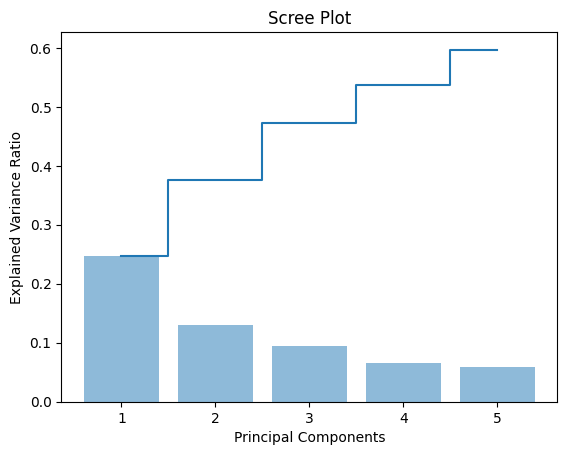

Explained Variance Ratio:
PC1: 0.2467
PC2: 0.1298
PC3: 0.0952
PC4: 0.0654
PC5: 0.0597


In [43]:
#Principal component analysis is conducted for the dimentionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features1 = ['LIMIT_BAL', 'AGE','EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3',
            'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pca_df_columns=df2[features1]
scaler = StandardScaler()
features1_standardized = scaler.fit_transform(pca_df_columns)

# Apply PCA with five components
num_components = 5

# Apply PCA with the specified number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(features1_standardized)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Create a DataFrame with the principal components
columns_pca = [f'PC{i}' for i in range(1, num_components + 1)]
df_pca = pd.DataFrame(data=principal_components, columns=columns_pca)

# Concatenate the original DataFrame with the PCA DataFrame
df_with_pca = pd.concat([pca_df_columns, df_pca], axis=1)

# Display the resulting DataFrame
print(df_with_pca.head())

# Plot the scree plot
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Print the explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i + 1}: {ratio:.4f}")

Data Balancing

In [44]:
#Data is imbalanced, data needs to be balanced to get an efficient model
#Create Train dataset and test dataset: considering the correlation the demographic variables are: "AGE","EDUCATION","MARRIAGE"

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

features = ['LIMIT_BAL', 'AGE','EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3',
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

y = df2_normalized['default payment next month'].copy() #Target variable
X = df2_normalized[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df_train = X_train.join(y_train)
print(df_train['default payment next month'].value_counts())

df_majority = df_train[df_train['default payment next month'] == 0]

df_minority = df_train[df_train['default payment next month'] == 1]


from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,replace=True, n_samples=18641,random_state=587)
# Combine majority class with upsampled minority class
df_upsampled= pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
print(df_upsampled['default payment next month'].value_counts())


#Apply downsample to minority class
df_majority_downsampled = resample(df_majority,replace=True, n_samples=5304,random_state=587)
# Combine minority class with downsampled majority class
df_downsampled= pd.concat([df_minority, df_majority_downsampled])
# Display new class counts
print(df_downsampled['default payment next month'].value_counts())

#So we have 2 dataset, Upsampled data creates synthetic data and downsampled data creates bias.

0.0    18641
1.0     5304
Name: default payment next month, dtype: int64
0.0    18641
1.0    18641
Name: default payment next month, dtype: int64
1.0    5304
0.0    5304
Name: default payment next month, dtype: int64
